<a href="https://colab.research.google.com/github/matalhim/nuclear/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Модель предсказания:
$$
\hat{Y}_i = m X_i^2 + b X_i^3
$$

Функция потерь:
$$
L = \frac{1}{n} \sum_{i=1}^{n} \left( Y_i - \hat{Y}_i \right)^2
$$

$$
L = \frac{1}{n} \sum_{i=1}^{n} \left( Y_i - m X_i^2 - b X_i^3 \right)^2
$$

Частная производная функции потерь по m
$$
\frac{\partial L}{\partial m} = \frac{\partial}{\partial m} \left( \frac{1}{n} \sum_{i=1}^{n} \left( Y_i - m X_i^2 - b X_i^3 \right)^2 \right)
$$
$$
\frac{\partial L}{\partial m} = \frac{1}{n} \sum_{i=1}^{n} 2 \left( Y_i - m X_i^2 - b X_i^3 \right) \left( -X_i^2 \right)
$$

$$
\frac{\partial L}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} \left( Y_i - \hat{Y}_i \right) X_i^2
$$

Обозначим $$ e_i = Y_i - \hat{Y}_i $$

Тогда:
$$
\frac{\partial L}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} e_i X_i^2
$$


Частная производная функции потерь по b
$$
\frac{\partial L}{\partial b} = \frac{\partial}{\partial b} \left( \frac{1}{n} \sum_{i=1}^{n} \left( Y_i - m X_i^2 - b X_i^3 \right)^2 \right)
$$

$$
\frac{\partial L}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} 2 \left( Y_i - m X_i^2 - b X_i^3 \right) \left( -X_i^3 \right)
$$
$$
\frac{\partial L}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} \left( Y_i - \hat{Y}_i \right) X_i^3
$$
$$
\frac{\partial L}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} e_i X_i^3
$$

Градиент по m:
$$
dm = \frac{\partial L}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} e_i X_i^2
$$

Градиент по b:
$$
db = \frac{\partial L}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} e_i X_i^3
$$



остановка на итерации 11923
2279.3900293543934
 answer :  25.055758345981324 -2.9670433073710742


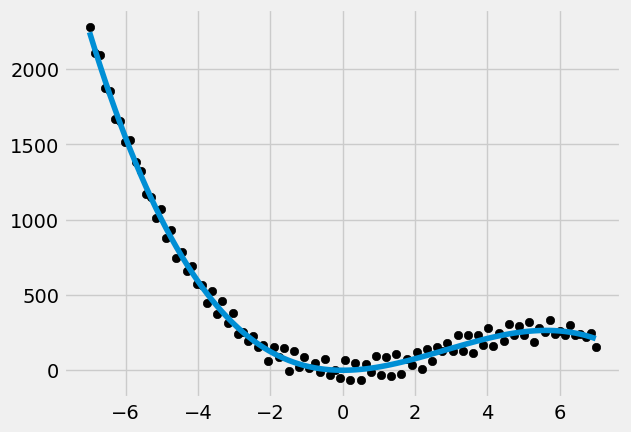

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import random

class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.00001, iterations=10):
        self.learning_rate, self.iterations = learning_rate, iterations
        self.X = np.array([])
        self.Y = np.array([])
        self.loss_history = []
        self.m = 0
        self.b = 0
        self.k = 0

    def PlotData(self):
        plt.style.use('fivethirtyeight')
        plt.scatter(self.X, self.Y, color='black')
        plt.plot(self.X, self.predict())
        plt.show()

    def SaveData(self):
        np.savez('SecondDataSet.npz', array1=self.X, array2=self.Y)


    def GenerateData(self):
            loaded_data = np.load('SecondDataSet.npz')
            self.X = loaded_data['array1']
            self.Y = loaded_data['array2']




    def fit(self):
        m = 10
        b = 0
        n = self.X.shape[0]
        tol = 1e-8

        for i in range(self.iterations):
            y_pred = m * self.X**2 + b * self.X**3
            err = self.Y - y_pred
            dm = (-2/n) * np.sum(err * self.X**2)
            db = (-2/n) * np.sum(err * self.X**3)
            m -= self.learning_rate * dm
            b -= self.learning_rate * db

            loss = np.mean(err**2)
            self.loss_history.append(loss)

            if (i > 1) and abs(self.loss_history[-1] - self.loss_history[-2]) < tol:
                print(f'остановка на итерации {i}')
                print(self.loss_history[-1])
                break

        self.m, self.b = m, b
        print(" answer : ", self.m, self.b)

    def predict(self):
            return self.m * self.X**2 + self.b*self.X**3





clf = GradientDescentLinearRegression(learning_rate=1e-6, iterations=100000)
clf.GenerateData()
clf.fit()
clf.PlotData()



